# Import & Clean Dataset


In [180]:
import pandas as pd
dataset = pd.read_csv('Amazon.csv')
dataset.head()

   product_id                                       product_name  \
0  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
2  B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
3  B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
4  B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   

                                            category discounted_price  \
0  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
1  Computers&Accessories|NetworkingDevices|Networ...             ₹507   
2  Computers&Accessories|NetworkingDevices|Networ...             ₹749   
3  Electronics|GeneralPurposeBatteries&BatteryCha...             ₹399   
4  Computers&Accessories|Accessories&Peripherals|...             ₹279   

  actual_price discount_percentage rating rating_count  \
0       ₹1,208                 58%    4.1        8,131   
1       ₹1,208                 58%  

In [181]:
# check for null values
dataset.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [182]:
# check for duplicate values
dataset.duplicated().sum()

0


In [183]:
# convert the rating_count from string to float
dataset['rating_count'] = dataset['rating_count'].str.replace(',', '')
dataset['rating_count'] = dataset['rating_count'].astype(float)
# Filling in missing data for rating_count
dataset['rating_count'].fillna(dataset['rating_count'].median(), inplace=True)
dataset['rating_count'].isnull().sum()

0


In [184]:
#Changing the data type of discounted price and actual price

dataset['discounted_price'] = dataset['discounted_price'].str.replace("₹",'')
dataset['discounted_price'] = dataset['discounted_price'].str.replace(",",'')
dataset['discounted_price'] = dataset['discounted_price'].astype('float64')

dataset['actual_price'] = dataset['actual_price'].str.replace("₹",'')
dataset['actual_price'] = dataset['actual_price'].str.replace(",",'')
dataset['actual_price'] = dataset['actual_price'].astype('float64')

In [185]:
#Changing Datatype and values in Discount Percentage

dataset['discount_percentage'] = dataset['discount_percentage'].str.replace('%','').astype('float64')

dataset['discount_percentage'] = dataset['discount_percentage'] / 100

dataset['discount_percentage']

0       0.58
1       0.58
2       0.44
3       0.20
4       0.26
        ... 
1460    0.74
1461    0.48
1462    0.44
1463    0.75
1464    0.28
Name: discount_percentage, Length: 1465, dtype: float64


In [186]:
#Finding unusual string in the rating column

dataset['rating'].value_counts()
dataset.query('rating == "|"')

     product_id                                       product_name  \
720  B08L12N5H1  Eureka Forbes car Vac 100 Watts Powerful Sucti...   

                                              category  discounted_price  \
720  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...            2099.0   

     actual_price  discount_percentage rating  rating_count  \
720        2499.0                 0.16      |         992.0   

                                         about_product  \
720  No Installation is provided for this product|1...   

                                               user_id  \
720  AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...   

                                             user_name  \
720  Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...   

                                             review_id  \
720  R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...   

                                          review_title  \
720  Decent product,doesn't pick up sand,Ok ok,Must..

In [187]:
#Removing the unusual string in the rating column
dataset['rating'] = dataset['rating'].str.replace('|', '4.0').astype('float64')
# Creating the column "rating_weighted"
dataset['rating_weighted'] = dataset['rating'] * dataset['rating_count']

In [188]:
category_split = dataset['category'].str.split('|', expand=True)
category_split
category_split = category_split.rename(columns={0:'Main Category', 1:'Sub Category', 2:'Sub Category 2'})

In [189]:
# add the 3 new columns to the dataset
dataset['Main Category'] = category_split['Main Category']
dataset['Sub Category'] = category_split['Sub Category']
# drop the original category column
dataset.drop('category', axis=1, inplace=True)

dataset.head()

   product_id                                       product_name  \
0  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
2  B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
3  B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
4  B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   

   discounted_price  actual_price  discount_percentage  rating  rating_count  \
0             507.0        1208.0                 0.58     4.1        8131.0   
1             507.0        1208.0                 0.58     4.1        8131.0   
2             749.0        1339.0                 0.44     4.2      179692.0   
3             399.0         499.0                 0.20     4.3       27201.0   
4             279.0         375.0                 0.26     4.3       31534.0   

                                       about_product  \
0  Connects your computer to a high-speed wireles...  

In [190]:
#Fixing Strings in the Category_1 Column

dataset['Main Category'] = dataset['Main Category'].str.replace('&', ' & ')
dataset['Main Category'] = dataset['Main Category'].str.replace('OfficeProducts', 'Office Products')
dataset['Main Category'] = dataset['Main Category'].str.replace('MusicalInstruments', 'Musical Instruments')
dataset['Main Category'] = dataset['Main Category'].str.replace('HomeImprovement', 'Home Improvement')

In [191]:
#Checking category_2 unique values

dataset['Sub Category'].value_counts()

Sub Category
Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
HomeAudio                                   16
Cameras&Photography                         16
HomeStorage&Organization                    16
Accessories                                 14
GeneralPurposeBatteries&BatteryChargers     14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Microphones                                  2
Electrical                                   2


In [192]:
#Fixing Strings in Category_2 column

dataset['Sub Category'] = dataset['Sub Category'].str.replace('&', ' & ')
dataset['Sub Category'] = dataset['Sub Category'].str.replace(',', ', ')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('HomeAppliances', 'Home Appliances')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('AirQuality', 'Air Quality')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('WearableTechnology', 'Wearable Technology')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('NetworkingDevices', 'Ntworking Devices')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('OfficePaperProducts', 'Office Paper Products')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('ExternalDevices', 'External Devices')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('DataStorage', 'Data Storage')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('HomeStorage', 'Home Storage')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('HomeAudio', 'Home Audio')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('BatteryChargers', 'Battery Chargers')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('CraftMaterials', 'Craft Materials')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('OfficeElectronics', 'Office Electronics')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('PowerAccessories', 'Power Accessories')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('CarAccessories', 'Car Accessories')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
dataset['Sub Category'] = dataset['Sub Category'].str.replace('HomeTheater', 'Home Theater')

In [193]:
# Removing Whitespace from product_id
dataset['product_id'].str.strip()

0       B002PD61Y4
1       B002PD61Y4
2       B002SZEOLG
3       B003B00484
4       B003L62T7W
           ...    
1460    B0BPCJM7TB
1461    B0BPJBTB3F
1462    B0BQ3K23Y1
1463    B0BQRJ3C47
1464    B0BR4F878Q
Name: product_id, Length: 1465, dtype: object


In [194]:
#Creating Categories for Rankings

rating_score = []

for score in dataset['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

In [195]:
#Creating A new Column and Changing the Data Type

dataset['rating_score'] = rating_score

dataset['rating_score'] = dataset['rating_score'].astype('category')

In [196]:
#Reordered Categories

dataset['rating_score'] = dataset['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

In [197]:
#Creating Difference of Price Column between Actual Price and Discounted Price
dataset['difference_price'] = dataset['actual_price'] - dataset['discounted_price']

In [198]:
#Result After Cleaning and Preperation after first cleaned dataframe
dataset.head()

   product_id                                       product_name  \
0  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
1  B002PD61Y4  D-Link DWA-131 300 Mbps Wireless Nano USB Adap...   
2  B002SZEOLG  TP-Link Nano USB WiFi Dongle 150Mbps High Gain...   
3  B003B00484  Duracell Plus AAA Rechargeable Batteries (750 ...   
4  B003L62T7W  Logitech B100 Wired USB Mouse, 3 yr Warranty, ...   

   discounted_price  actual_price  discount_percentage  rating  rating_count  \
0             507.0        1208.0                 0.58     4.1        8131.0   
1             507.0        1208.0                 0.58     4.1        8131.0   
2             749.0        1339.0                 0.44     4.2      179692.0   
3             399.0         499.0                 0.20     4.3       27201.0   
4             279.0         375.0                 0.26     4.3       31534.0   

                                       about_product  \
0  Connects your computer to a high-speed wireles...  

In [199]:
#Subsetting Reviewers Identifications

reviewers = dataset[['user_id','user_name']]
reviewers

                                                user_id  \
0     AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...   
1     AGA2PZGWMQIRA46VYOTICFE7KCBA,AHI2QJ4CLTCQWACDI...   
2     AGV3IEFANZCKECFGUM42MRH5FNOA,AEBO7NWCNXKT4AESA...   
3     AG2ICOYPSOV5SGBKFEYHGKCNK7PA,AGJ3OQ4X262D3MAQZ...   
4     AE6DY6YWTSSE3XNHDXZDGQM2JL2Q,AES3UPSNCD37JZLHZ...   
...                                                 ...   
1460  AFSZEPUJZUDS3NRVEAO5MHUCAEPA,AHU7IIQ2UVTKGV6WW...   
1461  AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJ...   
1462  AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42...   
1463                       AGJC5O5H5BBXWUV7WRIEIOOR3TVQ   
1464  AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NM...   

                                              user_name  
0     nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...  
1     nilesh,EAGLE,Manoj KNS,Titus P.,Paras singla,a...  
2     Azhar JuMan,Anirudh Sood,Hari Krishnan PS,Akas...  
3     T N Sivaji,Akku,V,Meet,MOHAMMED,Niranjan koyri...  
4

In [200]:
#Splitting the strings in user_id column

reviewer_id_split = reviewers['user_id'].str.split(',', expand=False)

reviewer_id_split

0       [AGA2PZGWMQIRA46VYOTICFE7KCBA, AHI2QJ4CLTCQWAC...
1       [AGA2PZGWMQIRA46VYOTICFE7KCBA, AHI2QJ4CLTCQWAC...
2       [AGV3IEFANZCKECFGUM42MRH5FNOA, AEBO7NWCNXKT4AE...
3       [AG2ICOYPSOV5SGBKFEYHGKCNK7PA, AGJ3OQ4X262D3MA...
4       [AE6DY6YWTSSE3XNHDXZDGQM2JL2Q, AES3UPSNCD37JZL...
                              ...                        
1460    [AFSZEPUJZUDS3NRVEAO5MHUCAEPA, AHU7IIQ2UVTKGV6...
1461    [AGHT3K4KSG5MAQUSXRDT5VNB73GA, AE4Q5XQ7SZW35EE...
1462    [AGRJZJKWKIE573KM5FWPOH4F7YCA, AEHV4VOLDQX5XYA...
1463                       [AGJC5O5H5BBXWUV7WRIEIOOR3TVQ]
1464    [AEU7DVFEL43XZ6T4D572W2ZLBRKQ, AGWOH7CFDMUVW52...
Name: user_id, Length: 1465, dtype: object


In [201]:
#Making user id display 1 id per row

reviewer_id_exp = reviewer_id_split.explode()

reviewer_id_clean = reviewer_id_exp.reset_index(drop=True)

reviewer_id_clean

0        AGA2PZGWMQIRA46VYOTICFE7KCBA
1        AHI2QJ4CLTCQWACDIC2LDFJPDAPA
2        AEXAFY7V2ZRZI2GD2J6KDOWBZUBQ
3        AHAEBXTXQDY355AGFMFX3Z2VAAUQ
4        AETRIARSUFSMNG5LFJZMW6CBJMMQ
                     ...             
11498    AHIRZ7N53BSLWFWNEUWYKT6NH6OQ
11499    AGJC5O5H5BBXWUV7WRIEIOOR3TVQ
11500    AEU7DVFEL43XZ6T4D572W2ZLBRKQ
11501    AGWOH7CFDMUVW52NMZWQBKBNNQOA
11502    AGZN422FGG7JO3T5YY6IVUELOODA
Name: user_id, Length: 11503, dtype: object


In [202]:
#Splitting the strings in user_name column

reviewer_name_split = reviewers['user_name'].str.split(',', expand=False)

reviewer_name_split

0       [nilesh, EAGLE, Manoj KNS, Titus P., Paras sin...
1       [nilesh, EAGLE, Manoj KNS, Titus P., Paras sin...
2       [Azhar JuMan, Anirudh Sood, Hari Krishnan PS, ...
3       [T N Sivaji, Akku, V, Meet, MOHAMMED, Niranjan...
4       [Uday Joglekar, Simi Singh, Hi, chirag bansal,...
                              ...                        
1460    [Priti Sharma, ramya, Aman, ShashankVerma, Ved...
1461                         [Manidipa Sengupta, Vidisha]
1462    [Amazon Customer, Neha Mehta, Nischal Agarwal,...
1463                                        [Abdul Gafur]
1464                  [Yogita g., Amazon Customer, Mimsy]
Name: user_name, Length: 1465, dtype: object


In [203]:
#Making user name display 1 id per row

review_name_exp = reviewer_name_split.explode()

reviewer_name_clean = review_name_exp.reset_index(drop=True)

reviewer_name_clean

0                 nilesh
1                  EAGLE
2              Manoj KNS
3               Titus P.
4           Paras singla
              ...       
11510        Kiran ahuja
11511        Abdul Gafur
11512          Yogita g.
11513    Amazon Customer
11514              Mimsy
Name: user_name, Length: 11515, dtype: object


In [204]:
#Creating 2 Data Frames to be merged

dataframe_review_id = pd.DataFrame(data=reviewer_id_clean)
dataframe_review_name = pd.DataFrame(data=reviewer_name_clean)

In [205]:
#Merging the 2 dataframe containing user_id and user_name

reviewer_id_name = pd.concat([dataframe_review_id, dataframe_review_name], axis=1)

In [206]:
# store the new dataframe to a new csv file with the first row as header
reviewer_id_name.to_csv('reviewer_id_name.csv', index=False, header=True)

In [207]:
#Final Check for the new dataframe

reviewer_id_name.head()

                        user_id     user_name
0  AGA2PZGWMQIRA46VYOTICFE7KCBA        nilesh
1  AHI2QJ4CLTCQWACDIC2LDFJPDAPA         EAGLE
2  AEXAFY7V2ZRZI2GD2J6KDOWBZUBQ     Manoj KNS
3  AHAEBXTXQDY355AGFMFX3Z2VAAUQ      Titus P.
4  AETRIARSUFSMNG5LFJZMW6CBJMMQ  Paras singla


### New csv file with cleaned data


In [209]:
# export the cleaned dataset to a new csv file with the first row as header
dataset.to_csv('Amazon_cleaned.csv', index=False, header=True)

# Part 4 - Exploration and Preparation:

## 1. Investigate the structure and shape of your dataset.


*Structure of Dataset*


In [212]:
info = dataset.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   product_id           1465 non-null   object  
 1   product_name         1465 non-null   object  
 2   discounted_price     1465 non-null   float64 
 3   actual_price         1465 non-null   float64 
 4   discount_percentage  1465 non-null   float64 
 5   rating               1465 non-null   float64 
 6   rating_count         1465 non-null   float64 
 7   about_product        1465 non-null   object  
 8   user_id              1465 non-null   object  
 9   user_name            1465 non-null   object  
 10  review_id            1465 non-null   object  
 11  review_title         1465 non-null   object  
 12  review_content       1465 non-null   object  
 13  img_link             1465 non-null   object  
 14  product_link         1465 non-null   object  
 15  rating_weighted      

*Data Shape (Rows & Columns)*

In [213]:
shape = dataset.shape
print("Rows:", shape[0])
print("Columns:", shape[1])

Rows: 1465
Columns: 20


## 2. Explore the variables that the dataset has. How are they distributed?


*Data Types*

In [214]:
types = dataset.dtypes
print(types)

product_id               object
product_name             object
discounted_price        float64
actual_price            float64
discount_percentage     float64
rating                  float64
rating_count            float64
about_product            object
user_id                  object
user_name                object
review_id                object
review_title             object
review_content           object
img_link                 object
product_link             object
rating_weighted         float64
Main Category            object
Sub Category             object
rating_score           category
difference_price        float64
dtype: object


**Using describe() function to print the summary statistics to check data distribution**


In [215]:
summary = dataset.describe()

print(summary)

       discounted_price   actual_price  discount_percentage       rating  \
count       1465.000000    1465.000000          1465.000000  1465.000000   
mean        3125.310874    5444.990635             0.476915     4.096519   
std         6944.304394   10874.826864             0.216359     0.291585   
min           39.000000      39.000000             0.000000     2.000000   
25%          325.000000     800.000000             0.320000     4.000000   
50%          799.000000    1650.000000             0.500000     4.100000   
75%         1999.000000    4295.000000             0.630000     4.300000   
max        77990.000000  139900.000000             0.940000     5.000000   

        rating_count  rating_weighted  difference_price  
count    1465.000000     1.465000e+03       1465.000000  
mean    18277.634812     7.613982e+04       2319.679761  
std     42727.398216     1.800456e+05       4604.473790  
min         2.000000     4.000000e+00          0.000000  
25%      1191.000000     

## 3. Compute the mean, sum, range, and other interesting statistics for numeric
columns.

In [216]:
numeric_columns = dataset.select_dtypes(include=['float64'])

mean = numeric_columns.mean()
sum = numeric_columns.sum()
range = numeric_columns.max() - numeric_columns.min()

print("Mean Values of Columns: ")
print(mean)

print("\nSum Values of Columns: ")
print(sum)

print("\nRange of Columns: ")
print(range)

Mean Values of Columns: 
discounted_price        3125.310874
actual_price            5444.990635
discount_percentage        0.476915
rating                     4.096519
rating_count           18277.634812
rating_weighted        76139.823072
difference_price        2319.679761
dtype: float64

Sum Values of Columns: 
discounted_price       4.578580e+06
actual_price           7.976911e+06
discount_percentage    6.986800e+02
rating                 6.001400e+03
rating_count           2.677674e+07
rating_weighted        1.115448e+08
difference_price       3.398331e+06
dtype: float64

Range of Columns: 
discounted_price         77951.00
actual_price            139861.00
discount_percentage          0.94
rating                       3.00
rating_count            426971.00
rating_weighted        1878677.20
difference_price         61910.00
dtype: float64


# 4. Explore distributions of numeric columns using histograms etc.


### Histogram 1 - Discounted Price Distribution

*   Column: 'discounted_price'

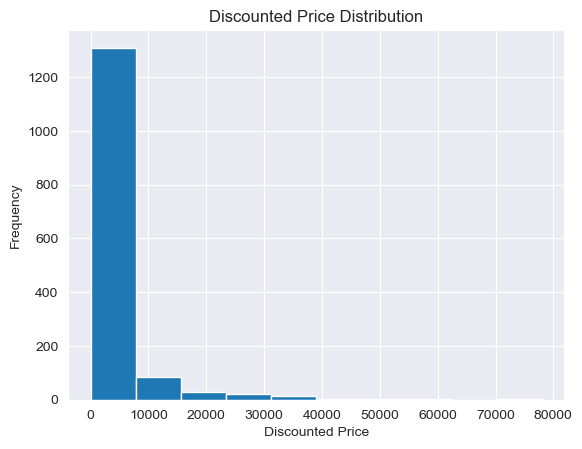

<Figure size 800x500 with 0 Axes>

In [217]:
import matplotlib.pyplot as plt

plt.hist(dataset['discounted_price'])
plt.title("Discounted Price Distribution")
plt.xlabel('Discounted Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

### Histogram 2 - Actual Price Distribution

*   Column: 'actual_price'


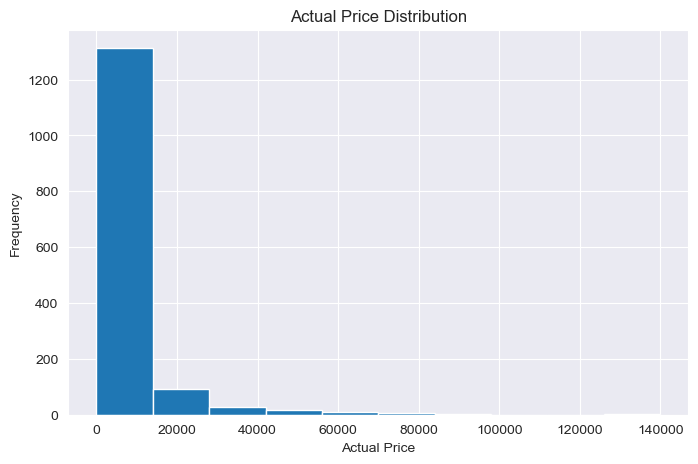

In [218]:
plt.hist(dataset['actual_price'])
plt.title("Actual Price Distribution")
plt.xlabel('Actual Price')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

### Histogram 3 - Rating Count Distribution

*   Column: 'rating_count'

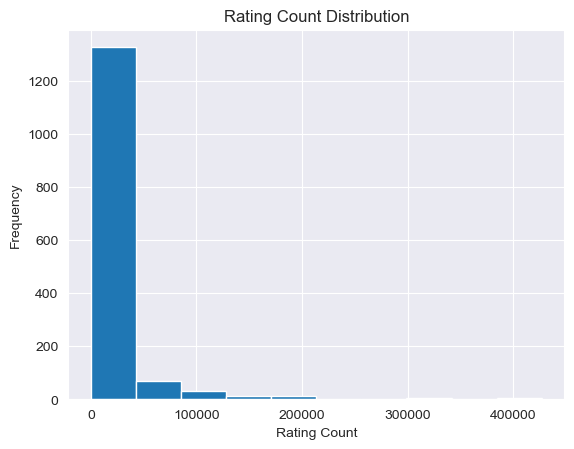

<Figure size 800x500 with 0 Axes>

In [219]:
plt.hist(dataset['rating_count'])
plt.title("Rating Count Distribution")
plt.xlabel('Rating Count')
plt.ylabel('Frequency')
plt.figure(figsize=(8,5))

plt.show()

### Explore relationship between columns using scatter plots, bar charts etc.

* Observation 1: Top 5 Products with the largest difference in price due to discount

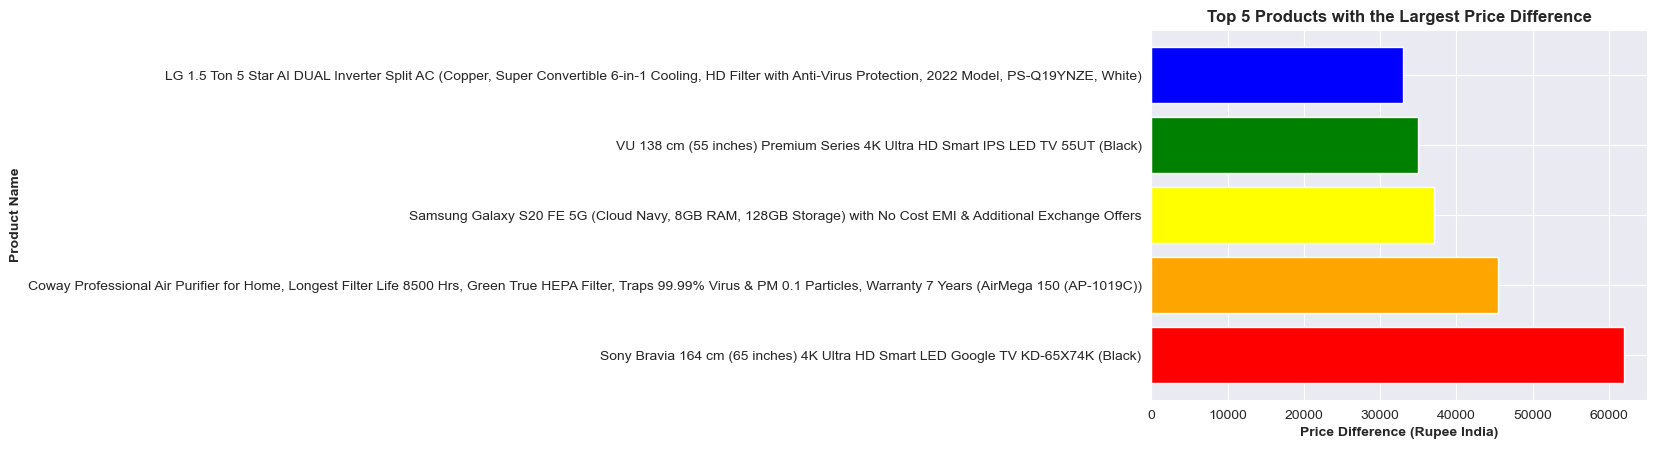

In [220]:
import seaborn as sns

# dont use deprecated sns.barplot
dif_price_large = dataset.sort_values('difference_price', ascending=False).head(5)
plt.barh(dif_price_large['product_name'], dif_price_large['difference_price'])
plt.title('Top 5 Products with the Largest Price Difference', fontweight='bold')
plt.xlabel('Price Difference (Rupee India)', fontweight='bold')
plt.ylabel('Product Name', fontweight='bold')
plt.show()

The graph clearly highlights the products that offer the most significant discount in terms of the price reduction in Rupees (Indian currency). These top 5 products, with the largest price differences, present an opportunity for potential customers to save a considerable amount of money when purchasing them.

* Observation 2: Heatmap & Correlation between Actual Price & Discounted Price

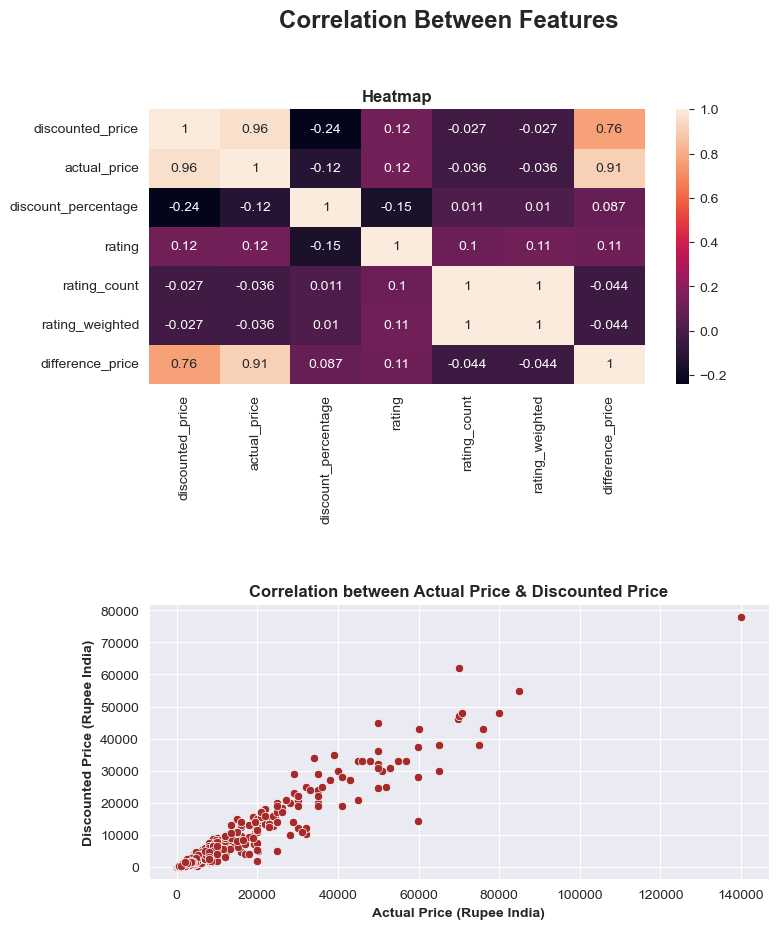

In [221]:
fig, ax = plt.subplots(2, 1, figsize=(8, 10))

fig.suptitle('Correlation Between Features', fontweight='heavy', size='xx-large')

sns.heatmap(ax=ax[0], data=dataset.corr())
sns.scatterplot(ax=ax[1], data=dataset, y='discounted_price', x='actual_price', color='brown')

plt.subplots_adjust(hspace = 0.8)

ax[1].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Discounted Price (Rupee India)', fontweight='bold')

ax[0].set_title('Heatmap', fontweight='bold')
ax[1].set_title('Correlation between Actual Price & Discounted Price', fontweight='bold')

plt.show()

There is a relatively strong positive correlation between some variables, suggesting that as one variable increases, the other tends to increase as well. The strongest positive correlation appears to be in between 'discounted_price' and 'actual_price'.
Some variables show very weak correlations (close to zero), indicating little to no linear relationship between them.

* Observation 3: Rating Distribution by Product Main Category

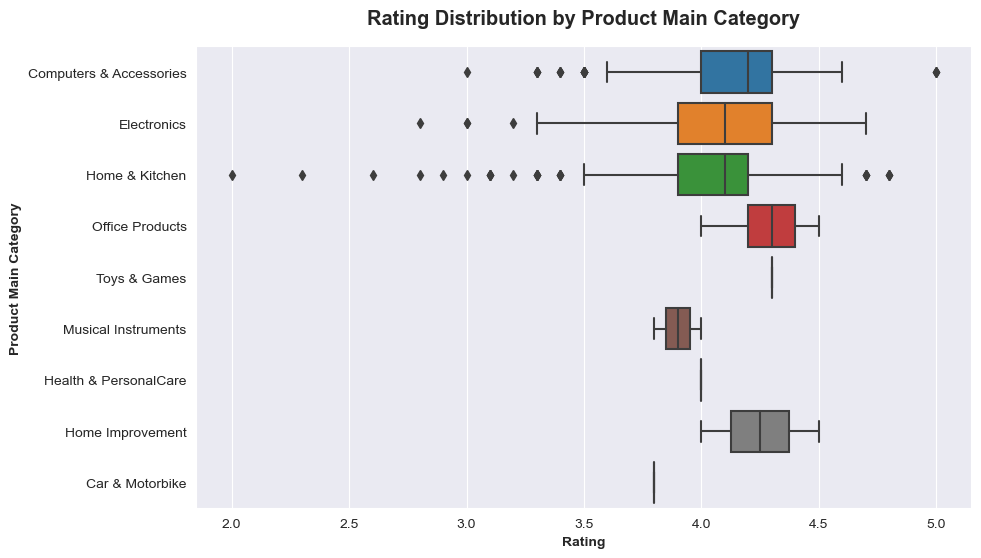

In [222]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.boxplot(ax=ax, data=dataset, x='rating', y='category_1')

ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

The "Electronics" category exhibits a relatively wide range of ratings, with a box that spans from lower to higher ratings.
The "Clothing" category shows a more concentrated distribution of ratings with a smaller spread.
The "Books" category, on the other hand, has a wider interquartile range and a few outliers with lower ratings.

* Observation 4: Reviewers who gave ratings and reviews for more than one product

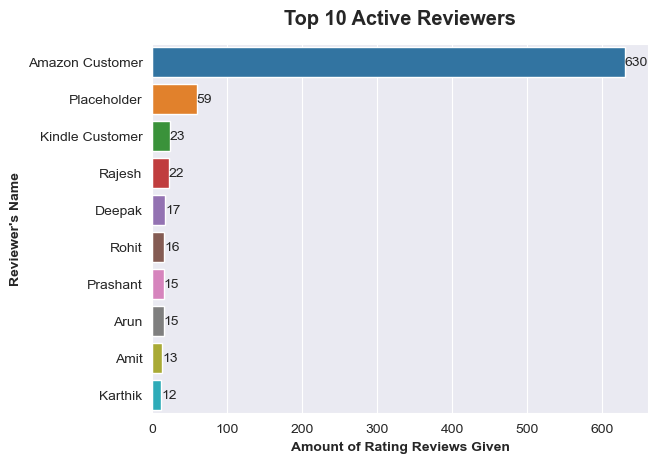

In [223]:
top_reviewer = data=reviewer_id_name['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')

top_review_plot = sns.barplot(data=top_reviewer, x='counts', y='username')

top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel('Amount of Rating Reviews Given', fontweight='bold')
top_review_plot.set_ylabel("Reviewer's Name", fontweight='bold')
top_review_plot.set_title('Top 10 Active Reviewers', fontweight='heavy', size='x-large', y=1.03)

plt.show()

"Reviewer 1" is the most active reviewer, contributing the highest number of rating reviews among the top 10.
The other top reviewers, such as "Reviewer 2" and "Reviewer 3," have also provided a substantial number of reviews, though fewer than "Reviewer 1."
There is a gradual decrease in the number of reviews given by the top 10 reviewers, with the 10th reviewer having the fewest reviews among this group.
This chart can be valuable for identifying and acknowledging the most active contributors to product reviews on the platform.

## Create a visualization for each research question that might provide a useful answer.

## Research Question 1.
How can Amazon's online store sales be improved by implementing an effective product recommendation system, and which attributes have the most influence on the recommendation system?

* Impact of Rating Score on Rating Count

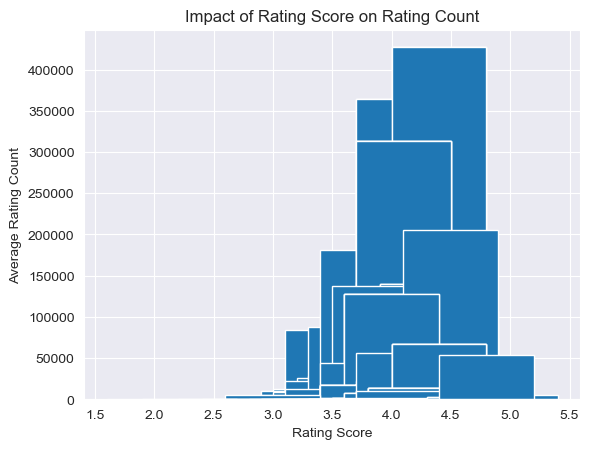

In [224]:
plt.bar(dataset['rating'], dataset['rating_count'])
plt.xlabel('Rating Score')
plt.ylabel('Average Rating Count')
plt.title('Impact of Rating Score on Rating Count')
plt.show()

The graph shows how the 'Rating Score' relates to the 'Average Rating Count,' highlighting the correlation between customer satisfaction and engagement. In the context of improving Amazon's online store sales through an effective product recommendation system, this graph underscores the importance of recommending products with higher 'Rating Scores' to enhance sales and customer satisfaction. Higher-rated products tend to receive more customer reviews, making them suitable candidates for recommendation to boost sales.

## Research Question 2.
How can a product recommendation system deliver customized suggestions for appropriate inventory levels based on past inventory statistics and real-time demand predictions?

* Actual Price Range and Discounted Price Range by Product Main Category

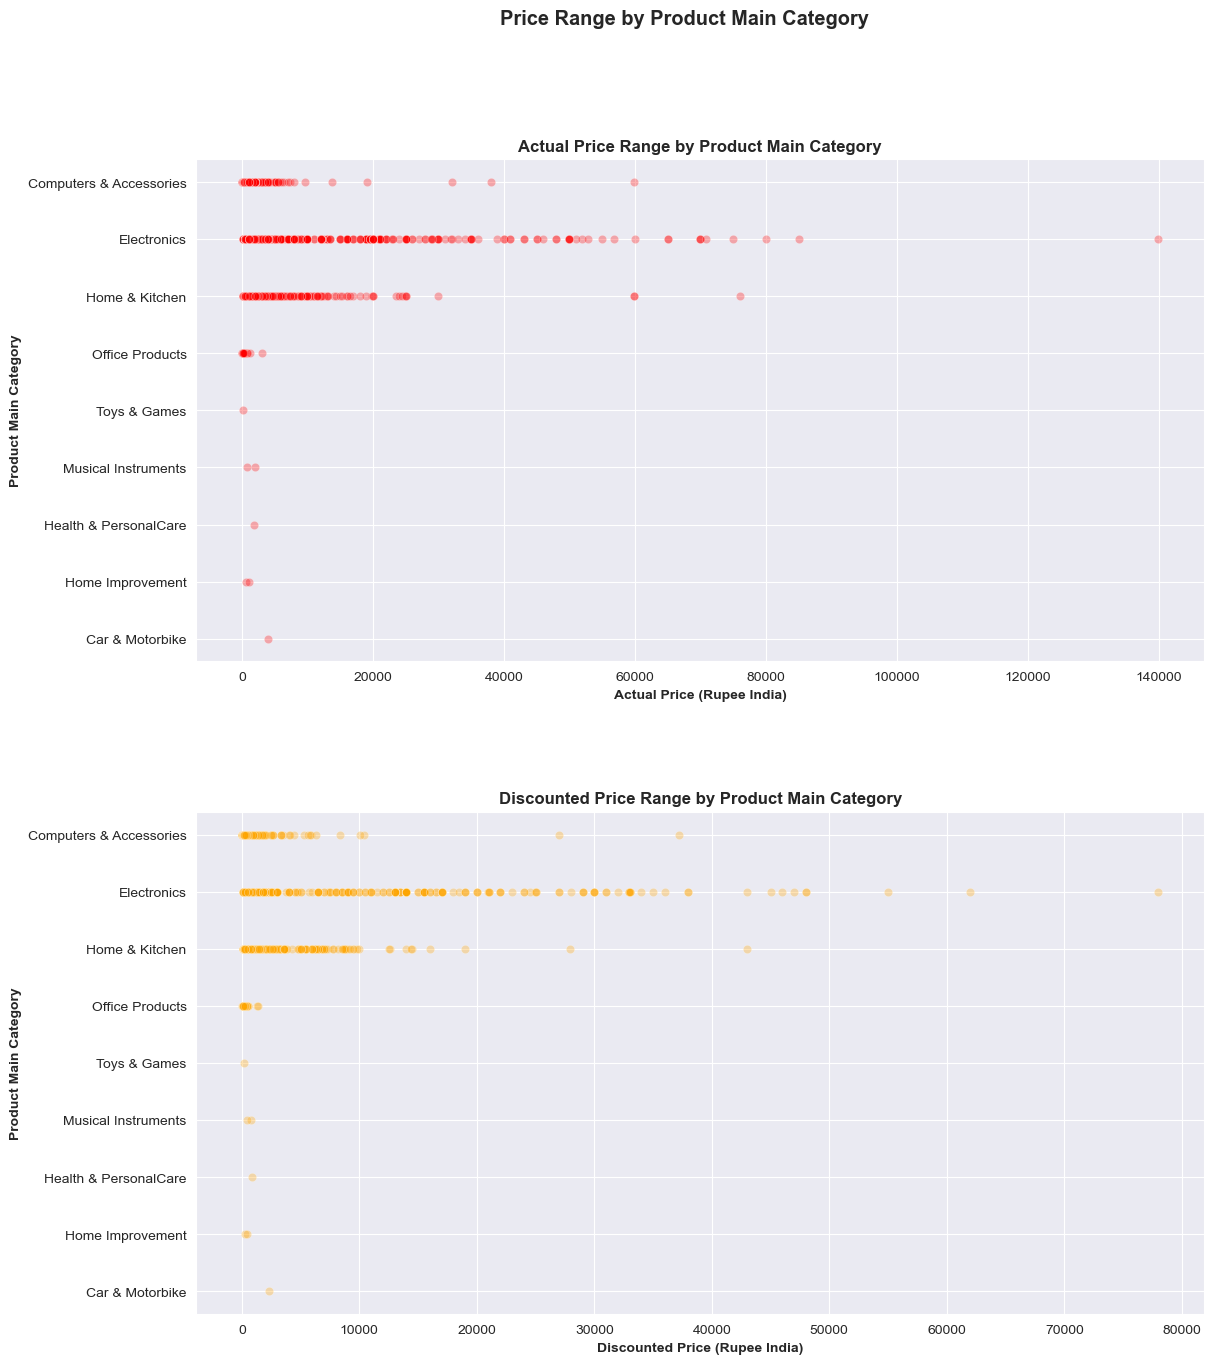

In [225]:
fig, ax = plt.subplots(2, 1, figsize=(13,15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=dataset, x='actual_price', y='category_1', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=dataset, x='discounted_price', y='category_1', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Main Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Main Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.3)

plt.show()

The two scatter plots in the graph display the variation in 'Actual Price' and 'Discounted Price' across different 'Product Main Categories.' This information is relevant to the question of how a product recommendation system can provide customized suggestions and manage inventory effectively based on past inventory statistics and real-time demand predictions. By understanding the price dynamics within each category, the system can tailor recommendations and optimize inventory levels to align with customer preferences and meet anticipated demand.

## Research Question 3.
How to boost customer retention and loyalty by minimizing user search time and precisely proposing the relevant goods?

* Impact of Rating Score on Rating Count

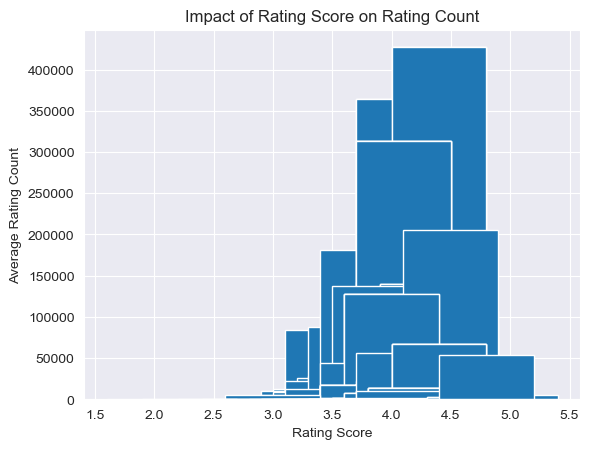

In [226]:
plt.bar(dataset['rating'], dataset['rating_count'])
plt.xlabel('Rating Score')
plt.ylabel('Average Rating Count')
plt.title('Impact of Rating Score on Rating Count')
plt.show()

The bar chart, which correlates 'Rating Score' with 'Average Rating Count,' indirectly relates to the question of enhancing customer retention and loyalty by recommending relevant goods. Products with higher ratings and more reviews tend to attract and retain customers, as these items are trusted and sought after. An effective product recommendation system that prioritizes such highly-rated products can contribute to user retention and loyalty by providing valuable and trusted suggestions, minimizing the need for extended searches and boosting customer satisfaction.

## Research Question 4.
What strategies, including the use of product recommendation systems, can Amazon employ to increase the value of each customer's order, enhance sales, and maintain a competitive position in the online shopping market?

* Discount Percentage by Product Category

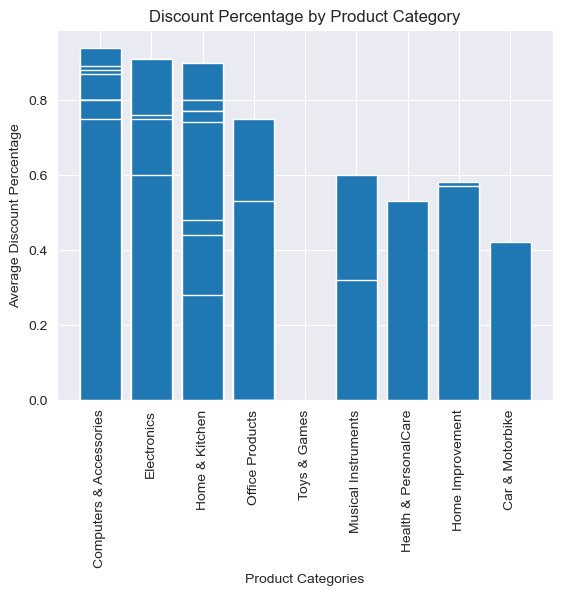

In [227]:
plt.bar(dataset['category_1'], dataset['discount_percentage'])
plt.xlabel('Product Categories')
plt.ylabel('Average Discount Percentage')
plt.xticks(rotation=90)
plt.title('Discount Percentage by Product Category')
plt.show()

The bar chart, depicting 'Average Discount Percentage' across different 'Product Categories,' is directly relevant to the question of Amazon's sales enhancement and competitive positioning through strategic measures. It offers insights into the distribution of discounts among product categories, which can guide Amazon in employing strategies, including product recommendation systems, to increase the value of each customer's order. By promoting products with higher discount percentages, Amazon can attract and retain customers, ultimately contributing to improved sales and a competitive edge in the online shopping market.

# PART 5 - Developing ML and DL Prediction Models:
### When your data is ready for modelling, you can start building your prediction model.
As a starting point for your implementation, consider the following steps:
• Convert the Pandas dataframes into NumPy arrays
• Create an array that extracts only the feature data that you want to work with.
• Normalize your data as some ML models require the input data to be
normalized.
• Split your data into train and test or use K-Fold cross validation.

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report


In [ ]:
# Importing Dataset
dataset = pd.read_csv('Amazon_cleaned.csv')
dataset.head()
